## Implementing Neural Network from Scratch using Numpy

In [25]:
# Creating data set
 
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

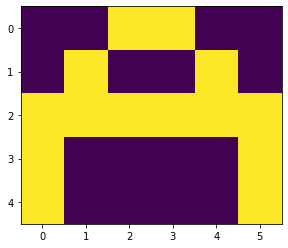

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [27]:
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]

In [28]:
y = np.array(y)

In [29]:
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [30]:
# activation function
 
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

In [31]:
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
     
    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [32]:
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

In [33]:
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

In [34]:
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
     
    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
 
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))
 
    
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)

In [35]:
 def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

In [36]:
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()   

In [37]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1, "\n", w2)

[[-0.32717633 -1.01631585  0.73021961 -0.88041824 -0.40048966]
 [ 0.74702596 -1.39567568  1.72183479  1.17390391 -0.44685638]
 [ 1.0310426  -0.93851251  0.9071271  -0.02855642  0.46350999]
 [ 0.62661499  0.57397472  0.56458431 -0.16004263  0.40512271]
 [-0.86929932  0.86733307 -0.65917236  1.91274317 -1.60515568]
 [ 0.36831838 -0.53817485 -2.58242348 -0.34680671 -0.60157904]
 [ 1.05153541 -1.53501758  1.53103363 -0.70854969 -0.5644551 ]
 [-0.95391944 -0.22140753  0.65100135  0.21771767 -0.96996957]
 [ 1.63035241 -1.90914248  0.05901584 -0.97074743 -2.41696251]
 [ 0.06816519  0.31021175 -0.27756398 -1.94653007 -2.29431916]
 [-1.65150746 -0.09919739  0.77584113  1.15531451  1.18183158]
 [ 0.17633023  1.93347382 -0.10977552 -0.59254119 -1.3636596 ]
 [ 2.02610627 -0.08005074 -1.01053434 -1.15696728 -1.13075032]
 [-0.84866672  0.21986899  1.30222985 -0.9823303  -0.48062843]
 [-1.43201976  0.77153338  1.14055773  1.12195702  0.31846304]
 [-0.32809939  0.54950183  0.75129472 -1.51793117  1.19

In [38]:
acc, loss, w1, w2 = train(x,y,w1,w2,0.1,100)

epochs: 1 ======== acc: 79.26648036311093
epochs: 2 ======== acc: 80.73641484529868
epochs: 3 ======== acc: 81.80515395688697
epochs: 4 ======== acc: 82.63826619607681
epochs: 5 ======== acc: 83.31854051088065
epochs: 6 ======== acc: 83.88957375033672
epochs: 7 ======== acc: 84.37663742750891
epochs: 8 ======== acc: 84.79601701866206
epochs: 9 ======== acc: 85.15930641315039
epochs: 10 ======== acc: 85.47543833994285
epochs: 11 ======== acc: 85.7516652655216
epochs: 12 ======== acc: 85.99404917510932
epochs: 13 ======== acc: 86.20772396337496
epochs: 14 ======== acc: 86.39705453449533
epochs: 15 ======== acc: 86.56574939470693
epochs: 16 ======== acc: 86.71695143170044
epochs: 17 ======== acc: 86.85331677944477
epochs: 18 ======== acc: 86.97708523995308
epochs: 19 ======== acc: 87.0901432336466
epochs: 20 ======== acc: 87.1940794951601
epochs: 21 ======== acc: 87.2902336749939
epochs: 22 ======== acc: 87.37973816894846
epochs: 23 ======== acc: 87.46355367442781
epochs: 24 ======== acc:

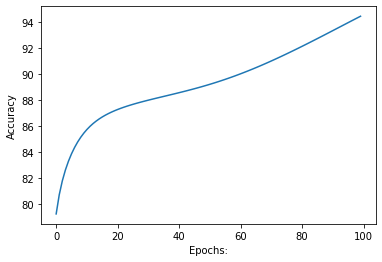

In [39]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt1.show()

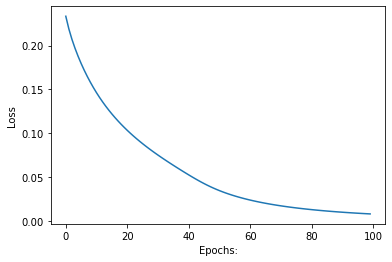

In [40]:
#plot loss
plt1.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt1.show()

In [41]:
print(w1, "\n", w2)

[[-0.32717633 -1.01631585  0.73021961 -0.88041824 -0.40048966]
 [ 0.63738689 -1.46866926  1.72018647  1.26581664 -0.71957443]
 [ 0.96632315 -0.98046981  0.90545928 -0.1633346   0.55665773]
 [ 0.56189554  0.53201741  0.56291649 -0.2948208   0.49827045]
 [-0.97893839  0.7943395  -0.66082068  2.0046559  -1.87787373]
 [ 0.36831838 -0.53817485 -2.58242348 -0.34680671 -0.60157904]
 [ 1.05153541 -1.53501758  1.53103363 -0.70854969 -0.5644551 ]
 [-1.01863888 -0.26336484  0.64933353  0.0829395  -0.87682183]
 [ 1.63035241 -1.90914248  0.05901584 -0.97074743 -2.41696251]
 [ 0.06816519  0.31021175 -0.27756398 -1.94653007 -2.29431916]
 [-1.66371558  0.60005861  0.77582574  0.83683452  1.25150631]
 [ 0.17633023  1.93347382 -0.10977552 -0.59254119 -1.3636596 ]
 [ 2.07102589 -0.04901447 -1.01055384 -1.38365818 -0.76488453]
 [-0.91338617  0.17791169  1.30056203 -1.11710847 -0.38748069]
 [-1.44422788  1.47078939  1.14054234  0.80347703  0.38813776]
 [-0.34030751  1.24875784  0.75127933 -1.83641116  1.26

Image is of letter A.


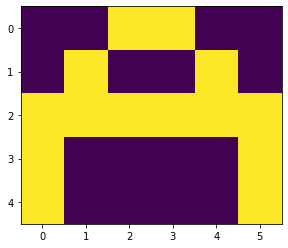

In [43]:
predict(x[0], w1, w2)